# Project: Ambient Agents with LangGraph - Module 1

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

# LangGraph 101

# Chat models

In [2]:
from langchain.chat_models import init_chat_model

llm = init_chat_model('openai:gpt-4.1', temperature=0)

# Running the model

- `invoke()` - a single input is transformed into an output
- `stream()` - outputs are streamed as they are generated

In [3]:
result = llm.invoke("What is an agent?")
type(result)

langchain_core.messages.ai.AIMessage

In [5]:
from rich.markdown import Markdown

Markdown(result.content)

The term "agent" can have different meanings depending on the context. Here are some common definitions:           

                                               1. General Definition                                               

An agent is someone or something that acts on behalf of another or has the power to act. It is an entity that does 
something or causes something to happen.                                                                           

                              2. In Artificial Intelligence (AI) and Computer Science                              

An agent is a system or program that perceives its environment through sensors and acts upon that environment using
actuators to achieve specific goals. For example:                                                                  

 • A software agent might be a program that searches the internet for information.                                 
 • An AI agent could be a robot that navigates a room.                                                             

Key characteristics:                                                                                               

 • Autonomy: Can operate without direct intervention.                                                              
 • Reactivity: Responds to changes in the environment.                                                             
 • Pro-activeness: Takes initiative to achieve goals.                                                              

                                              3. In Business and Law                                               

An agent is a person or company authorized to act on behalf of another (the principal) in business transactions.   
For example:                                                                                                       

 • A real estate agent sells property for clients.                                                                 
 • A travel agent arranges trips for customers.                                                                    

                                            4. In Chemistry and Biology                                            

An agent is a substance that brings about a chemical or biological effect. For example:                            

 • A cleaning agent removes dirt.                                                                                  
 • An infectious agent causes disease.                                                                             

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
In summary:                                                                                                        
An agent is an entity (person, program, or substance) that acts, does something, or causes something to happen,    
often on behalf of someone or something else. The specific meaning depends on the field or context.

# Tools

Creating tools can be done using the `@tool` decorator, which transforms Python functions into callable tools.

It will automatically infer the tool's name, description, and expected arguments from the function definition.

In [6]:
from langchain.tools import tool

@tool
def write_email(to: str, subject: str, content: str) -> str:
    """Write and send an email."""
    # Placeholder response
    return f"Email sent to {to} with subject '{subject}' and content: {content}"

In [7]:
type(write_email)

langchain_core.tools.structured.StructuredTool

In [8]:
write_email.args

{'to': {'title': 'To', 'type': 'string'},
 'subject': {'title': 'Subject', 'type': 'string'},
 'content': {'title': 'Content', 'type': 'string'}}

In [9]:
Markdown(write_email.description)

Write and send an email.

# Tool calling

We can use `bind_tools` methods to augment an LLM with tools.

Providers often have parameters such as `tool_choice` to enforce calling specific tools. The `'any'` option will select at least one of the tools. In addition, we can set `parallel_tool_calls=False` to ensure the model will only call one tool as a time.

In [10]:
# Connect tools to a chat model
model_with_tools = llm.bind_tools(
    [write_email],
    tool_choice='any',
    parallel_tool_calls=False
)

# The model will now be able to call the tools
output = model_with_tools.invoke(
    "Draft a reponse to my boos (boss@company.ai) about tomorrow's meeting"
)

In [11]:
type(output)

langchain_core.messages.ai.AIMessage

In [12]:
output

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_bCw4lDjvYlZzLovunoiDSz10', 'function': {'arguments': '{"to":"boss@company.ai","subject":"Re: Tomorrow\'s Meeting","content":"Dear [Boss\'s Name],\\n\\nThank you for the reminder about tomorrow\'s meeting. I confirm my attendance and look forward to discussing the agenda items. Please let me know if there is anything specific you would like me to prepare or bring to the meeting.\\n\\nBest regards,\\n[Your Name]"}', 'name': 'write_email'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 68, 'total_tokens': 159, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_daf5fcc80a', 'id': 'chatcmpl-CJL2l3lILG3M5Yh53OwWMQyQ03hSQ', 'service_tier': 'd

In [14]:
output.tool_calls

[{'name': 'write_email',
  'args': {'to': 'boss@company.ai',
   'subject': "Re: Tomorrow's Meeting",
   'content': "Dear [Boss's Name],\n\nThank you for the reminder about tomorrow's meeting. I confirm my attendance and look forward to discussing the agenda items. Please let me know if there is anything specific you would like me to prepare or bring to the meeting.\n\nBest regards,\n[Your Name]"},
  'id': 'call_bCw4lDjvYlZzLovunoiDSz10',
  'type': 'tool_call'}]

In [16]:
# Extract tool calls and execute them
args = output.tool_calls[0]['args']
args

{'to': 'boss@company.ai',
 'subject': "Re: Tomorrow's Meeting",
 'content': "Dear [Boss's Name],\n\nThank you for the reminder about tomorrow's meeting. I confirm my attendance and look forward to discussing the agenda items. Please let me know if there is anything specific you would like me to prepare or bring to the meeting.\n\nBest regards,\n[Your Name]"}

In [18]:
# Call the tool
result = write_email.invoke(args)
Markdown(result)

Email sent to boss@company.ai with subject 'Re: Tomorrow's Meeting' and content: Dear [Boss's Name],               

Thank you for the reminder about tomorrow's meeting. I confirm my attendance and look forward to discussing the    
agenda items. Please let me know if there is anything specific you would like me to prepare or bring to the        
meeting.                                                                                                           

Best regards, [Your Name]

# Workflows

We can embed LLM calls into pre-defined workflows, giving the system more agency to make decisions.

For example, we can add a router step to determine whether to write an email or not.

# Agents

We can further increase agency, allowing the LLM to dynamically direct its own tool usage.

Agents are typically implemented as tool calling in a loop, where the output of each tool call is used to inform the next action.

Agents are well suited to open-ended problems where it is difficult to predict the exact steps needed in advance.

Workflows are often appropriate when the control flow can easily be defined in advance.

|  | Workflow | Agent |
|---|---|---|
| Action sequence | Easy to enumerate in advance | Unkonwn until runtime |
| Process | Linear or branching | Flexible decision making (backtracking, etc) |
| Performance | Latency/cost are critical | Trade-off for more generalization |


**Heuristics of Agents:** If we can draw the flow on a whiteboard easily, it is probably better as a hard-coded workflow. If we cannot predict how the system should proceed without seeing the user's input, we probably need an agent.

# LangGraph

LangGraph provides low-level supporting infrastructure that sits underneath any workflow or agent system and provides:
- **Control**: make it easy to define and/or combine agents and workflows
- **Persistence**: provide a way to persist the state of a graph, which enables both memory and human-in-the-loop
- **Testing, Debugging, and Deployment**: provide an easy onramp for testing, debugging, and deploying agents and workflows

## Control

In [19]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END


class StateSchema(TypedDict):
    request: str
    email: str


workflow = StateGraph(StateSchema)

Each node in a graph is simply a python function. This gives us full control over the logic inside each node. They receive the current state, and return a dictionary to update the state.

By default, state keys are overwritten. However, we can define custom update logic.

In [20]:
def write_email_node(state: StateSchema) -> StateSchema:
    output = model_with_tools.invoke(state['request'])
    args = output.tool_calls[0]['args']
    email = write_email.invoke(args)
    return {'email': email}

Now we can specify the control flow by adding edges and nodes to our state graph.

In [21]:
workflow.add_node('write_email_node', write_email_node)

workflow.add_edge(START, 'write_email_node')
workflow.add_edge('write_email_node', END)

app = workflow.compile()

In [22]:
app.invoke(
    {"request": "Draft a response to my boss (boss@company.ai) about tomorrow's meeting"}
)

{'request': "Draft a response to my boss (boss@company.ai) about tomorrow's meeting",
 'email': "Email sent to boss@company.ai with subject 'Re: Tomorrow's Meeting' and content: Hello,\n\nThank you for the reminder about tomorrow's meeting. I confirm my attendance and will be prepared with the necessary updates and materials.\n\nPlease let me know if there is anything specific you would like me to address or bring to the meeting.\n\nBest regards,\n\n[Your Name]"}

**Routing** between nodes can be done by conditionally using a simple function.

The return value of this function is used as the name of the node (or list of nodes) to send the state to next.

We can optionally provide a dictionary that maps the `should_continue` output to the name of the next node.

In [24]:
from typing import Literal
from langgraph.graph import MessagesState
from email_assistant.utils import show_graph


def call_llm(state: MessagesState) -> MessagesState:
    """Run LLM"""
    output = model_with_tools.invoke(state['messages'])
    return {'messages': [output]}


def run_tool(state: MessagesState):
    """Perform the tool call"""
    result = []
    for tool_call in state['messages'][-1].tool_calls:
        observation = write_email.invoke(tool_call['args'])
        result.append(
            {
                'role': 'tool',
                'content': observation,
                'tool_call_id': tool_call['id']
            }
        )

    return {'messages': result}


def should_continue(state: MessagesState) -> Literal['run_tool', '__end__']:
    """Route to tool handler, or end if Done tool called"""
    # Get the last message
    messages = state['messages']
    last_message = messages[-1]

    # If the last message is a tool call, check if it is a Done tool call
    if last_message.tool_calls:
        return 'run_tool'
    # Otherwise, we stop (reply to the user)
    return END


# Create the graph
workflow = StateGraph(MessagesState)
# Add nodes
workflow.add_node('call_llm', call_llm)
workflow.add_node('run_tool', run_tool)
# Add edges
workflow.add_edge(START, 'call_llm')
workflow.add_conditional_edges(
    'call_llm',
    should_continue,
    {
        'run_tool': 'run_tool',
        END: END
    }
)
workflow.add_edge('run_tool', END)

# Compile
app = workflow.compile()

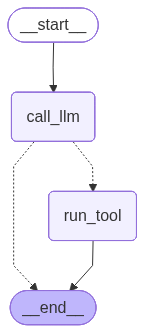

In [25]:
show_graph(app)

In [26]:
result = app.invoke(
    {"messages": [{
        "role": "user", 
        "content": "Draft a response to my boss (boss@company.ai) confirming that I want to attend Interrupt!"
    }]}
)
for m in result["messages"]:
    m.pretty_print()

================================ Human Message =================================

Draft a response to my boss (boss@company.ai) confirming that I want to attend Interrupt!
================================== Ai Message ==================================
Tool Calls:
  write_email (call_CpUcgEgHMVqD6NqaIzbAjEII)
 Call ID: call_CpUcgEgHMVqD6NqaIzbAjEII
  Args:
    to: boss@company.ai
    subject: Confirmation: Attendance at Interrupt!
    content: Hi,

Thank you for letting me know about Interrupt! I would like to confirm that I am interested in attending the event.

Please let me know if there are any next steps or additional details I should be aware of.

Best regards,

[Your Name]
================================= Tool Message =================================

Email sent to boss@company.ai with subject 'Confirmation: Attendance at Interrupt!' and content: Hi,

Thank you for letting me know about Interrupt! I would like to confirm that I am interested in attending the event.

Please let

Because such agents are in a common pattern, LangGraph has a pre-built agent abstraction. With LangGraph's pre-built method, we can just pass in the LLM, tools, and prompt.

In [27]:
from langgraph.prebuilt import create_react_agent

agent = create_react_agent(
    model=llm,
    tools=[write_email],
    prompt="Respond to the user's request using the tools provided."
)

# Run the agent
result = agent.invoke(
    {"messages": [{
        "role": "user", 
        "content": "Draft a response to my boss (boss@company.ai) confirming that I want to attend Interrupt!"
    }]}
)

for m in result["messages"]:
    m.pretty_print()

================================ Human Message =================================

Draft a response to my boss (boss@company.ai) confirming that I want to attend Interrupt!
================================== Ai Message ==================================
Tool Calls:
  write_email (call_BH2x3KpcmVb9siweGqEhaNEo)
 Call ID: call_BH2x3KpcmVb9siweGqEhaNEo
  Args:
    to: boss@company.ai
    subject: Confirmation: Attendance at Interrupt!
    content: Hi,

Thank you for the opportunity. I am confirming that I would like to attend Interrupt! Please let me know if there are any next steps or additional information needed from my side.

Best regards,

[Your Name]
================================= Tool Message =================================
Name: write_email

Email sent to boss@company.ai with subject 'Confirmation: Attendance at Interrupt!' and content: Hi,

Thank you for the opportunity. I am confirming that I would like to attend Interrupt! Please let me know if there are any next steps or a

## Persistence

### Threads

LangGraph has a built-in persistence layer, implemented through checkpointers. When we compile graph with a checkpointer, the checkpointer saves a checkpoint of the graph at every step.

Checkpoints are saved to a thread, which can be accessed after graph execution completes.

In [28]:
from langgraph.checkpoint.memory import InMemorySaver

agent = create_react_agent(
    model=llm,
    tools=[write_email],
    prompt="Respond to the user's request using the tools provided.",
    checkpointer=InMemorySaver()
)

config = {
    "configurable": {"thread_id": "1"}
}
result = agent.invoke(
    {"messages": [{"role": "user", "content": "What are some good practices for writing emails?"}]}, 
    config
)

In [29]:
# Get the lastest state snapshot
config = {
    'configurable': {'thread_id': '1'}
}
state = agent.get_state(config)

for msg in state.values['messages']:
    msg.pretty_print()

================================ Human Message =================================

What are some good practices for writing emails?
================================== Ai Message ==================================

Here are some good practices for writing effective emails:

1. **Use a Clear Subject Line:** Make your subject concise and informative so the recipient knows what to expect.

2. **Greet Appropriately:** Start with a polite greeting, using the recipient’s name if possible.

3. **Be Concise and Direct:** Get to the point quickly. Avoid unnecessary details and keep your message focused.

4. **Use Proper Formatting:** Break your email into short paragraphs or bullet points for readability.

5. **Be Polite and Professional:** Use courteous language and maintain a professional tone, even if the email is informal.

6. **Proofread Before Sending:** Check for spelling, grammar, and punctuation errors.

7. **Include a Clear Call to Action:** If you need a response or action, state it cl

In [30]:
# Continue the conversation
result = agent.invoke(
    {"messages": [{"role": "user", "content": "Good, let's use lesson 3 to craft a response to my boss confirming that I want to attend Interrupt"}]}, 
    config
)

for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

What are some good practices for writing emails?
================================== Ai Message ==================================

Here are some good practices for writing effective emails:

1. **Use a Clear Subject Line:** Make your subject concise and informative so the recipient knows what to expect.

2. **Greet Appropriately:** Start with a polite greeting, using the recipient’s name if possible.

3. **Be Concise and Direct:** Get to the point quickly. Avoid unnecessary details and keep your message focused.

4. **Use Proper Formatting:** Break your email into short paragraphs or bullet points for readability.

5. **Be Polite and Professional:** Use courteous language and maintain a professional tone, even if the email is informal.

6. **Proofread Before Sending:** Check for spelling, grammar, and punctuation errors.

7. **Include a Clear Call to Action:** If you need a response or action, state it cl

In [31]:
# Continue the conversation
result = agent.invoke(
    {"messages": [{"role": "user", "content": "I like this, let's write the email to boss@company.ai"}]}, 
    config
)
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

What are some good practices for writing emails?
================================== Ai Message ==================================

Here are some good practices for writing effective emails:

1. **Use a Clear Subject Line:** Make your subject concise and informative so the recipient knows what to expect.

2. **Greet Appropriately:** Start with a polite greeting, using the recipient’s name if possible.

3. **Be Concise and Direct:** Get to the point quickly. Avoid unnecessary details and keep your message focused.

4. **Use Proper Formatting:** Break your email into short paragraphs or bullet points for readability.

5. **Be Polite and Professional:** Use courteous language and maintain a professional tone, even if the email is informal.

6. **Proofread Before Sending:** Check for spelling, grammar, and punctuation errors.

7. **Include a Clear Call to Action:** If you need a response or action, state it cl

### Interrupts

In [ ]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

from langgraph.types import Command, interrupt
from langgraph.checkpoint.memory import InMemorySaver

class State(TypedDict):
    input: str
    user_feedback: str

def step_1(state):
    print("---Step 1---")
    pass

def human_feedback(state):
    print("---human_feedback---")
    feedback = interrupt("Please provide feedback:")
    return {"user_feedback": feedback}

def step_3(state):
    print("---Step 3---")
    pass

builder = StateGraph(State)
# Add nodes
builder.add_node("step_1", step_1)
builder.add_node("human_feedback", human_feedback)
builder.add_node("step_3", step_3)
# Add edges
builder.add_edge(START, "step_1")
builder.add_edge("step_1", "human_feedback")
builder.add_edge("human_feedback", "step_3")
builder.add_edge("step_3", END)

# Set up memory
memory = InMemorySaver()

# Add
graph = builder.compile(checkpointer=memory)

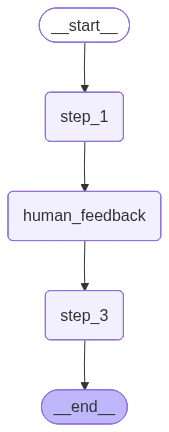

In [33]:
show_graph(graph)

In [34]:
# Input
initial_input = {"input": "hello world"}

# Thread
thread = {"configurable": {"thread_id": "1"}}

# Run the graph until the first interruption
for event in graph.stream(initial_input, thread, stream_mode="updates"):
    print(event)
    print("\n")

---Step 1---
{'step_1': None}


---human_feedback---
{'__interrupt__': (Interrupt(value='Please provide feedback:', id='170d599a9129f24bec4699c6b4a0d296'),)}




The graph stops executing when it reaches an interrupt node as expected.

To resume from an interrupt, we can use the `Command` object.

In [35]:
# Continue the graph execution after interruption
for event in graph.stream(
    Command(resume='go to step 3.'),
    thread,
    stream_mode="updates"
):
    print(event)
    print("\n")

---human_feedback---
{'human_feedback': {'user_feedback': 'go to step 3.'}}


---Step 3---
{'step_3': None}




# Tracing

When we are using LangChain or LangGraph, **LangSmith** logging will work out of the box with the following environment variables:

```bash
export LANGSMITH_TRACING=true
export LANGSMITH_API_KEY=<your_langsmith_api_key>
```

# Deployment

We will deploy our graph using LangGraph Platform. This creates a server with an API that we can use to interact with our graph and an interactive IDE, LangGraph Studio.

In our project directory, we have the following structure:

```
my-app/
├── src/email_assistant # all project code lies within here
│   └── langgraph101.py # code for constructing your graph
├── .env # environment variables
├── langgraph.json  # configuration file for LangGraph
└── pyproject.toml # dependencies for your project
```

The `langgraph.json` file specifies the dependencies, graphs, environment variables, and other settings requried to start a LangGraph Platform server.